### Ch 5 - Resampling Methods

#### 5.0 Introduction

- Repeatedly drawing samples from a training set and refitting a model of interest on each sample to get more info about the fitted model
- Computationally expensive (fitting same method multiple times) but recent advances allow this to be overcome
- Two common methods: cross-validation and bootstrap. 
- Cross-validation: can be used for test error for model assessment or selection.
- Bootstrap: can be used to provide a measure of accuracy


- Model assessment: evaluating performance
- Model selection: choosing proper level of flexibility

#### 5.1 Cross-Validation

- Low test error = good. Easily calculated if test set is available, but this is usually not the case. Training error can easily be calculated. The two are usually different though, with training often underestimating test.
- There are methods to estimate the test error rate (chapter 6). 
- In this section, we designate a part of the training set as the test set. We consider regression for the first few examples.
  
**Validation Set Approach** 
- Randomly dividing available set into training set and a validation/holdout set. A model is fit on the training set and the fitted model is used to predict observations on the validation set. The validation error rate (usually as MSE) provides an estimate of the test error rate.
- Eg. We can use the validation set approach and test the MSE for different orders of a predictor, as done in the book. 
- The random divisions of the dataset will result in different mean squared errors, and these different divisions show that there is no consensus as to which order performs best on average (Fig 5.2).
- While simple and easy to understand, there are drawbacks: 
  - Validation estimate of test error rate can be variable
  - We only train with a subset of observations, so the validation set error rate can overestimate the test error rate.

**Leave-One-Out Cross-Validation**
- LOOCV splits the set into two parts but instead of creating two subsets, a single observation $(x_1,y_1)$ instead is used for the validation set and the rest make up the training set. The model is fit on the training, and predicted on the single observation.
- The excluded observation was not used in the fitting process so the MSE for this observation, $\text{MSE}_1$, provides an unbiased estimate for the test error, but it is a poor estimate as it is highly variable since its based off of one observation.
- We repeat the process by selecting another observation $(x_2,y_2)$ for the validation set, and the rest for training, and computing the $\text{MSE}_2$. We extend this to all n observations for $\text{MSE}_1,\ldots,\text{MSE}_n$. The estimate for the test MSE is the average of these:
  
$$ \text{CV}_{(n)}=\frac{1}{n}\sum_{i=1}^{n}\text{MSE}_{i} $$

- Advantages
  - Far less bias, so LOOCV does not overestimate the test error rate as much as the validation set approach
  - LOOCV will always yield the same results.

- The main problem of LOOCV is that it can be resource intensive if n is large as the model is fit n times. 
- With least squares or polynomial regression, we can reduce the computations down to a single formula:
$$\text{CV}_{(n)}=\frac{1}{n}\sum_{i=1}^n\left(\frac{y_i-\hat{y}_i}{1-h_i}\right)^2$$
... where $\hat{y}_i$ is the ith value from the original least squares fit, and $h_i$ is the leverage. 
- This magic formula doesn't hold in general, which can potentially still make this method intensive

**k-Fold Cross-Validation**
- The data is divided into observations of k groups (folds) of approximately equal size. The first fold is validation and the rest are training, with an associated $\text{MSE}_1$ on the validation set. This is repeated K times, until several MSEs are calculated. Finally, the k-fold CV estimate is computed by averaging:

$$\text{CV}_{(k)} = \frac{1}{k}\sum_{i=1}^{k}\text{MSE}_{i}$$


- LOOCV is a special case where k = n.
- The main advantage is computation - we have k < n and so have (n-k) less computations. There can also be other non-computational advantages eg. one involving bias-variance tradeoff.
- CV curves generally have the correct shape but underestimate the true test MSE. We are sometimes interested in the location of the minimum point of the estimated curve and not the estimated MSE, because this allows us to choose the most optimal model for the lowest test error.

**k-Fold CV and the Bias-Variance Trade-Off**
- LOOCV would be preferred to k-fold CV for reducing bias as it uses a larger sample size for the training data.
- LOOCV, however, has a higher variance than k-fold CV with k < n. LOOCV trains on almost the same dataset, so these outputs are highly positively correlated. k-Fold CV with k < n averages the outputs of k fitted models which are less correlated (smaller overlap of training sets).
- The mean of many highly correlated quantities (LOOCV) has a higher variance than the mean of many quantities not correlated (k-Fold CV). 
- From above, we optimally set k = 5 or 10 as these have been shown empirically to yield test error rates suffering neither from high bias or high variance.


**CV on Classification Problems**
- CV also works on qualitative data but instead of MSE, we use the number of misclassified observations. For example, for LOOCV:


$$ \text{CV}_{(n)}=\frac{1}{n}\sum_{i=1}^{n}\text{Err}_{i} $$

...with $\text{Err}_i=I(y_i \neq \hat{y}_i)$

The book uses an example to demonstrate a point (Figs 5.7-8)
- Training error rate generally decreases as model complexity increases (overfitting)
- Test error displays a characteristic U-shape (bias-variance trade-off)
- 10-fold CV used to estimate test error rate provides a good approximation (though still underestimated), and also provides a good estimate to which flexibility is optimal. 
- Another example is shown with the KNN classifier (1/K as x-axis) which shows similar results



#### 5.2 The Bootstrap

- Useful as it can be applied to a range of methods

Example:
- We want to invest a fraction of our money $\alpha$ in $X$ and the rest $1-\alpha$ in $Y$. We want to choose $\alpha$ to minimise the amount total variance of our investment, $\text{Var}(\alpha X + (1-\alpha)Y )$. The minimum is given by 
$$\alpha = \frac{\sigma^2_Y-\sigma_{XY}}{\sigma_X^2+\sigma^2_Y-2\sigma_{XY}}$$
- The true values for the variances and covariances are unknown but can be estimated from a dataset with past measurements fo $X$ and $Y$. In the example, a thousand estimates for $\alpha$ were calculated by running the simulation of 100 paired observations of X and Y 1000 times.
- Having done this, they obtained a mean $\bar{\alpha}$ with a low SE which was very close to the real value.
- In practice, we cannot just generate new samples for real data. The bootstrap approach allows a computer to emulate new sample generation to estimate $\hat{\alpha}$ without actually generating new samples

**The Bootstrap Method (See Fig 5.11)**
- Consider a dataset $Z$ with $n=3$ observations. 
- Select $n$ observations from the data set to produce a bootstrap dataset $Z^{*1}$ with replacement, so the same observation can occur more than once in the bootstrap dataset. Both X and Y values of all observations are included.
- This procedure is repeated a large number, $B$, times to produce $B$ bootstrap data sets $Z^{*1},Z^{*2},\ldots,Z^{*B}$ with $B$ corresponding estimates $\hat{\alpha}^{*1},\hat{\alpha}^{*2},\ldots,\hat{\alpha}^{*B}$. 
- The SE can then be calculated as:
$$\text{SE}_B(\hat{\alpha})=\sqrt{\frac{1}{B-1}\sum_{r=1}^{B}\left(\hat{\alpha}^{*r}-\frac{1}{B}\sum_{r'=1}^{B}\hat{\alpha}^{*r'}\right)}$$
- This method can be applied to real data, and looks similar to the simulated data sets. The bootstrap approach can be used effectively to estimate the variability associated with $\hat{\alpha}$.

#### 5.3 Lab: Cross-Validation and the Bootstrap

In [2]:
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from sklearn.model_selection import train_test_split

from sklearn.model_selection import (cross_validate, KFold, ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

## The problem with ISLP is that it uses the ISLP
## library which isn't used in conventional data science.
## I would prefer if we implemented code from standard libraries
## Like patsy and MS?

In [3]:
Auto = load_data("Auto")
Auto_train, Auto_valid =train_test_split(Auto, test_size=196, random_state=0)

X_train = sm.add_constant(Auto_train[['horsepower']])
X_valid = sm.add_constant(Auto_valid[['horsepower']])
y_train = Auto_train["mpg"]
y_valid = Auto_valid["mpg"]

model = sm.OLS(y_train, X_train)
results = model.fit()
predictions = results.predict(X_valid)

print(f"MSE: {np.mean((y_valid - predictions)**2)}")


MSE: 23.61661706966988


In [4]:
Auto = load_data("Auto")
Auto_train, Auto_valid = train_test_split(Auto, test_size=196, random_state=0)

predictors = " + ".join(list(filter(lambda x: x != "horsepower", Auto.columns)))
results = smf.ols("mpg ~ horsepower", Auto_train).fit().predict(Auto_valid)

print(f"MSE: {np.mean((Auto_valid["mpg"] - results)**2)}")

MSE: 23.61661706966988


In [5]:
def add_poly_features(df, col, degree):
    df_poly = df.copy()
    for d in range(2,degree+1):
        df_poly[f"{col}^{d}"]=df_poly[col] ** d
    return df_poly

def evalMSE(terms,response,train,test):
    X_train = sm.add_constant(train[terms])
    X_test = sm.add_constant(test[terms])
    y_train = train[response]
    y_test = test[response]
    results = sm.OLS(y_train, X_train).fit()
    predictions = results.predict(X_test)
    return np.mean((predictions - y_test)**2)

MSE = np.zeros(3)
for idx, degree in enumerate(range(1,4)):
    train_poly = add_poly_features(Auto_train,"horsepower", degree)
    test_poly = add_poly_features(Auto_valid,"horsepower", degree)
    terms = ["horsepower"] + [f"horsepower^{d}" for d in range(2,degree+1)]
    MSE[idx] = evalMSE(terms,"mpg", train_poly, test_poly)
print(MSE)

[23.61661707 18.76303135 18.79694163]


In [6]:
Auto_train, Auto_valid =train_test_split(Auto, test_size=196, random_state=3)

MSE = np.zeros(3)
for idx, degree in enumerate(range(1,4)):
    train_poly = add_poly_features(Auto_train,"horsepower", degree)
    test_poly = add_poly_features(Auto_valid,"horsepower", degree)
    terms = ["horsepower"] + [f"horsepower^{d}" for d in range(2,degree+1)]
    MSE[idx] = evalMSE(terms,"mpg", train_poly, test_poly)
print(MSE)

[20.75540796 16.94510676 16.97437833]


In [7]:

from ISLP.models import sklearn_sm, ModelSpec as islpMS
hp_model = sklearn_sm(sm.OLS, islpMS(["horsepower"]))
X, y = Auto.drop(columns=["mpg"]), Auto["mpg"]
cv_results = cross_validate(hp_model, X, y, cv=Auto.shape[0])
cv_err = np.mean(cv_results["test_score"])
cv_err

np.float64(24.231513517929216)

In [19]:
import patsy
import statsmodels.api as sm
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, RegressorMixin


## Implementation of sklearn_sm wrapper
class sklearn_sm_new(BaseEstimator, RegressorMixin):
    def __init__(self, model_type, formula=None, model_args=None):
        self.model_type = model_type
        self.formula = formula
        self.model_args = {} if model_args is None else model_args

    def fit(self, X, y):
        data = X.copy()
        data["_y"] = y
        y_design, X_design = patsy.dmatrices(f"_y ~ {self.formula}", data, return_type="dataframe")
        self.columns_ = X_design.columns
        self.model_ = self.model_type(y_design, X_design, **self.model_args).fit()
        return self

    def predict(self, X):
        X_design = patsy.dmatrix(f"{self.formula}", X, return_type="dataframe")
        return self.model_.predict(X_design)

    def score(self, X, y, sample_weight=None):
        y_pred = self.predict(X)
        return -np.mean((y - y_pred) ** 2) 

hp_model = sklearn_sm_new(sm.OLS, formula="horsepower")
X, y = Auto.drop(columns=["mpg"]), Auto["mpg"]
cv_results = cross_validate(hp_model, X, y, cv=Auto.shape[0]) # cv = K, here K = n so LOOCV
cv_err = -np.mean(cv_results["test_score"])
cv_err

np.float64(24.231513517929216)

In [21]:

from ISLP.models import sklearn_sm, ModelSpec as islpMS
hp_model = sklearn_sm(sm.OLS, islpMS(["horsepower"]))
X, y = Auto.drop(columns=["mpg"]), Auto["mpg"]
cv_results = cross_validate(hp_model, X, y, cv=Auto.shape[0])
cv_err = np.mean(cv_results["test_score"])
cv_err

np.float64(24.231513517929216)

In [22]:
from ISLP.models import sklearn_sm
cv_error = np.zeros(5)
H = np.array(Auto["horsepower"])
M = sklearn_sm(sm.OLS)
for i, d in enumerate(range(1,6)):
    X = np.power.outer(H, np.arange(d+1))
    M_CV = cross_validate(M, X, y, cv=Auto.shape[0])
    cv_error[i] = np.mean(M_CV["test_score"])
cv_error

array([24.23151352, 19.24821312, 19.33498406, 19.42443031, 19.03320903])

In [23]:
cv_error = np.zeros(5)
cv = KFold(n_splits=10, shuffle=True, random_state=0)
for i, d in enumerate(range(1,6)):
    X = np.power.outer(H, np.arange(d+1))
    M_CV = cross_validate(M, X, y, cv=cv)
    cv_error[i] = np.mean(M_CV["test_score"])
cv_error

# Much faster. Quadratic fit still seems most optimal.


array([24.20766449, 19.18533142, 19.27626666, 19.47848402, 19.13722633])

In [24]:
validation = ShuffleSplit(n_splits=10, test_size= 196, random_state=0)
results = cross_validate(hp_model, Auto.drop(["mpg"], axis=1), Auto["mpg"], cv=validation)
results["test_score"], results["test_score"].mean(), results["test_score"].std()

## The calculated std is not a valid estimate of the sampling variability as
## the training samples overlap, thus introducing correlation.

(array([23.61661707, 22.96552529, 23.43853845, 21.72781699, 22.79416823,
        23.09191932, 23.69196999, 23.90184611, 26.53545818, 26.258467  ]),
 np.float64(23.802232661034164),
 np.float64(1.4218450941091847))

In [25]:
## ## Bootstrap

Portfolio = load_data("Portfolio")
def alpha_func(D, idx):
    cov_ = np.cov(D[["X","Y"]].loc[idx],rowvar=False)
    return ((cov_[1,1] - cov_[0,1])/(cov_[0,0]+cov_[1,1]-2*cov_[0,1])) # Formula 5.7
alpha_func(Portfolio, range(100))

np.float64(0.57583207459283)

In [26]:
rng = np.random.default_rng(0)
alpha_func(Portfolio, rng.choice(100,100,replace=True))

np.float64(0.6074452469619004)

In [27]:
def boot_SE(func, D, n=None, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0,0
    n = n or D.shape[0]
    for _ in range(B):
        idx = rng.choice(D.index, n, replace=True)
        value = func(D, idx)
        first_ += value
        second_ += value**2
    return np.sqrt(second_ / B - (first_ / B)**2)

alpha_SE = boot_SE(alpha_func, Portfolio, B=1000, seed=0)
alpha_SE # Our SE, by the formula, is 0.09

np.float64(0.09118176521277699)

In [28]:
## ## Bootstrapping an OLS model
from functools import partial

Auto = Auto.reset_index()


def boot_OLS(model_matrix, response, D, idx):
    D_ = D.loc[idx]
    Y_ = D_[response]
    X_ = clone(model_matrix).fit_transform(D_)
    return sm.OLS(Y_,X_).fit().params

hp_func = partial(boot_OLS, MS(["horsepower"]), "mpg")
## func2 = partial(func, par1, par2...)
## Partial takes parameters and "freezes them into func"
## This means func2 is a version of func with a reduced number 
## of parameters. So, in this case, hp_func = boot_OLS(D, idx)
## which is suitable for boot_SE.

rng = np.random.default_rng(0)
np.array([hp_func(Auto, rng.choice(392, 392, replace = True)) for _ in range(10)])
hp_se = boot_SE(hp_func, Auto, B=1000, seed=10)
hp_se


intercept     0.848807
horsepower    0.007352
dtype: float64

In [29]:
hp_model.fit(Auto, Auto["mpg"])
hp_model.results_.bse

## Using the formula 3.8 under 3.1.2, we obtain SEs of 0.717499 and 0.006446
## The standard formulae rely on certain assumptions
##      Eg. they depend on the unknown parameter sigma squared, the noise variance
##      Sigma squared was then estimated using the RSS
##      The formula of the SEs do not rely on the linear model being correct,
##      but the estimate for sigma squared does.
##      Eg. Assumes that the x_i are fixed and all variability comes from
##      variation in the errors epsilon_i
## Bootstrap does not rely on these assumptions, and so gives a more accurate
## Estimate of the SEs of hat betas 0 and 1 than those from sm.OLS

intercept     0.717499
horsepower    0.006446
dtype: float64

In [31]:
quad_model = MS([poly("horsepower",2, raw=True)])
quad_func = partial(boot_OLS, quad_model, "mpg")
boot_SE(quad_func, Auto, B=1000)

intercept                                  2.067840
poly(horsepower, degree=2, raw=True)[0]    0.033019
poly(horsepower, degree=2, raw=True)[1]    0.000120
dtype: float64

In [32]:
M = sm.OLS(Auto["mpg"], quad_model.fit_transform(Auto))
summarize(M.fit())["std err"]

intercept                                  1.800
poly(horsepower, degree=2, raw=True)[0]    0.031
poly(horsepower, degree=2, raw=True)[1]    0.000
Name: std err, dtype: float64

#### 5.4a Conceptual Exercises

1. Need to use identity $V(aX + bY) = a^2V(X) + b^2V(Y) + 2ab\text{Cov}(X,Y)$ and differentiate, with $\frac{\text{d}}{\text{d}a}=0$
2. a. (n-1)/n as there is a 1/n chance of selecting it
   
   b. (n-1)/n as the jth observation is not removed

   c. There is an equally likely chance (n-1)/n that the jth element is not removed, and there are n elements, so the chance j is not included is (1-1/n)^n

   d. When n = 5, the probability it's in the sample is 1 - (1-1/5)^5 = 0.67232

   e. When n = 100, the probability it's in the sample is 1 - (1-1/100)^100 = 0.6334

   f. When n = 10000, the probability it's in the sample is 1 - (1-1/10000)^10000 = 0.6321

   g + h (see below)

3. a. K Fold Cross validation is implemented by first splitting the dataset into K folds of roughly equal amounts of observations. One fold is chosen to be excluded, and the rest of the folds are used for fitting a model. The excluded fold is used as the validation dataset. The process is repeated for all K folds. The CV estimate is the average of all the MSEs calculated.
   
   b.

      i. Adv: K Fold does not give as variable test error estimates, validation set does (lower variance) due to using all observations in training and validation.
      Disadv: Validation set is simpler and easier to understand, and less computationally intensive. 
      
      ii. Adv: K Fold is less computationally intensive than LOOCV. K Fold also has lower variance as training sets differ between folds. Disadv: In general, LOOCV can provide more accurate estimates due to using larger training sets. LOOCV also has lower bias.
4. We can use a bootstrap method. This relies on repeatedly sampling B samples of size n from the original dataset with replacement and refitting a model, predicting the same X. A standard deviation can then be calculated from the estimates of Y calculated from the bootstrap datasets, which gives an approximate for the standard deviation of Y.

0.6321223982317534


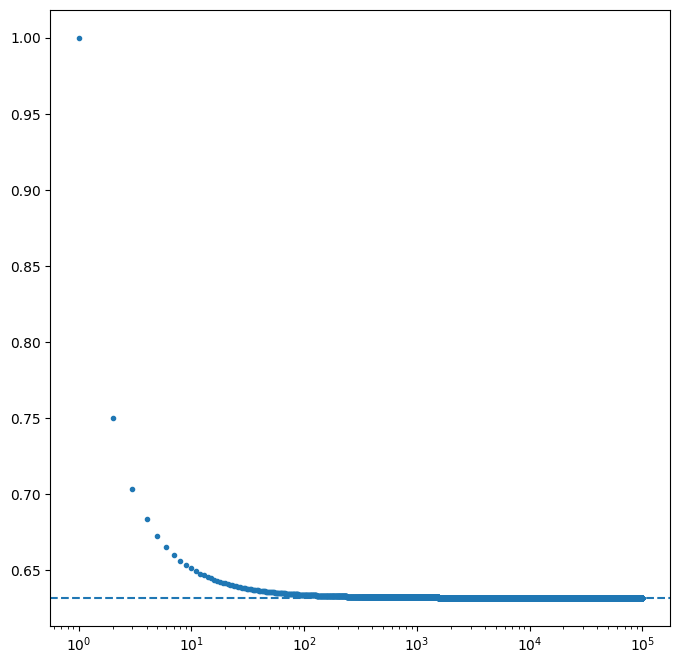

In [ ]:
## 2. g
from matplotlib.pyplot import subplots
fig, ax = subplots(figsize=(8,8))
x = np.arange(1,100000)
y = 1 - (1 - 1/x)**x
ax.scatter(x,y, marker=".")
ax.set_yscale("linear")
ax.set_xscale("log")
ax.axhline(1-(1-1/100000)**100000, linestyle="--")
print(1-(1-1/100000)**100000);
## Value tends to (1 - 1/e)

In [ ]:
## 2. h

rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100, replace=True) == 4) > 0
np.mean(store)

## In only 0.9% of the bootstrap samples, the observation is not included
## So the samples should generally be representative

np.float64(0.0089)

#### 5.4b Applied Exercises

In [89]:
## 5. a

from ISLP import load_data
import numpy as np
import pandas as pd
import statsmodels.api as sm  
from sklearn.model_selection import train_test_split

data = load_data("default")
x = pd.DataFrame(data[["income", "balance"]])
y = data["default"].map(lambda x: 1 if x == "Yes" else 0)
x = sm.add_constant(x)

model = sm.GLM(y, x, family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Thu, 14 Aug 2025   Deviance:                       1579.0
Time:                        23:42:05   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================
"""

In [ ]:
## 5. b + c

(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state=1)
x_train, x_test, y_train, y_test

model2 = sm.GLM(y_train, x_train, family = sm.families.Binomial())
results = model2.fit().predict(x_test).map(lambda x: 1 if x > 0.5 else 0)
print(np.mean(results != y_test)*100)

# Random state = 1:
# Test 0.2 => 2.7% error
# Test 0.4 => 2.5% error 
# Test 0.1 => 3.0% error

# Varying the splits varies error between 2.0 - 3.0 %

3.0


#### SUMMARY (Alt Lab)

In [80]:
## Standard Imports
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (cross_validate, KFold, ShuffleSplit)
from sklearn.base import clone

In [81]:
## Validation Set Approach


Auto = load_data("Auto")
X = Auto[["horsepower"]].values
y = Auto["mpg"].values

Auto_train, Auto_valid = train_test_split(Auto, test_size=196, random_state=0)
X_train = sm.add_constant(Auto_train[['horsepower']])
X_valid = sm.add_constant(Auto_valid[['horsepower']])
y_train = Auto_train['mpg']
y_valid = Auto_valid['mpg']

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_valid)
error_mse = np.mean((y_valid-predictions)**2)
error_mse

np.float64(23.61661706966988)

In [82]:
## Validation Set for Higher Orders

from sklearn.preprocessing import PolynomialFeatures
def evalMSE(degree, response, train, test):
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_poly = poly.fit_transform(train[['horsepower']])
    X_test_poly = poly.transform(test[['horsepower']])
    X_train_sm = sm.add_constant(X_train_poly)
    X_test_sm = sm.add_constant(X_test_poly)
    y_train = train[response]
    y_test = test[response]
    model = sm.OLS(y_train, X_train_sm).fit()
    predictions = model.predict(X_test_sm)
    return np.mean((y_test - predictions) ** 2)

MSE = np.zeros(3)
for idx, degree in enumerate(range(1,4)):
    MSE[idx] = evalMSE(degree,"mpg",Auto_train,Auto_valid)
MSE

array([23.61661707, 18.76303135, 18.79694163])

In [83]:
## Cross-Validation Set-up (wrapper)

from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.api as sm
import numpy as np

class sklearn_sm(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model
        self.results_ = None
    
    def fit(self, X, y):
        # Don't add constant here, already included in X
        self.results_ = self.model(y, X).fit()
        return self
    
    def predict(self, X):
        return self.results_.predict(X)
    
from sklearn.preprocessing import PolynomialFeatures

def generate_poly_features(X, degree):
    poly = PolynomialFeatures(degree, include_bias = True)
    return poly.fit_transform(X)



In [84]:
## LOOCV

from sklearn.model_selection import cross_validate

cv_error = np.zeros(5)
H = np.array(Auto['horsepower'])
X = np.power.outer(H, np.arange(d+1)) 
Y = np.array(Auto['mpg'])
M = sklearn_sm(sm.OLS)

for i, d in enumerate(range(1,6)):
    X = np.power.outer(H, np.arange(d+1))  # includes intercept column
    M_CV = cross_validate(M, X, Y, cv=Auto.shape[0], scoring="neg_mean_squared_error")
    cv_error[i] = -np.mean(M_CV['test_score'])

print(cv_error)


[24.23151352 19.24821312 19.33498406 19.42443031 19.03320903]


In [85]:
## KFold

from sklearn.model_selection import KFold

cv_error = np.zeros(5)
cv = KFold(n_splits=10, shuffle=True, random_state=0)
for i,d in enumerate(range(1,6)):
    X = np.power.outer(H,np.arange(d+1))
    M_CV = cross_validate(M,X,Y,cv=cv, scoring="neg_mean_squared_error")
    cv_error[i] = -np.mean(M_CV["test_score"])
cv_error

array([24.20766449, 19.18533142, 19.27626666, 19.47848402, 19.13722633])

In [ ]:
## Bootstrap - estimating a statistic of interest

Portfolio = load_data('Portfolio')
def alpha_func(D, idx):
    cov_ = np.cov(D[['X','Y']].loc[idx], rowvar=False)
    return ((cov_[1,1] - cov_[0,1])/(cov_[0,0]+cov_[1,1]-2*cov_[0,1])) # standard formula

rng = np.random.default_rng(0) # sets seed

def boot_SE(func, D, n=None, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = n or D.shape[0]
    for _ in range(B):
        idx = rng.choice(D.index, n, replace=True)
        value = func(D, idx) # Returns hat alpha for the randomly chosen datapoint
        first_ += value 
        second_ += value**2
    return np.sqrt(second_ / B - (first_ / B)**2)

alpha_SE = boot_SE(alpha_func, Portfolio, B=1000, seed=0)
alpha_SE

np.float64(0.09118176521277699)

In [97]:
## Bootstrap - estimating a linear regression model
Auto = load_data("Auto")
Auto = Auto.reset_index()
def boot_OLS(model_matrix, response, D, idx):
    D_ = D.iloc[idx]
    Y_ = D_[response]
    X_ = clone(model_matrix).fit_transform(D_)
    return sm.OLS(Y_, X_).fit().params

hp_func = partial(boot_OLS, MS(['horsepower']), 'mpg')
rng = np.random.default_rng(0)
np.array([hp_func(Auto,rng.choice(392,392,replace=True)) for _ in range(10)])

hp_model.fit(Auto, Auto["mpg"])
model_se = hp_model.results_.bse
hp_se = boot_SE(hp_func, Auto, B=1000, seed=10)
hp_se,model_se 

(intercept     0.848807
 horsepower    0.007352
 dtype: float64,
 intercept     0.717499
 horsepower    0.006446
 dtype: float64)

In [105]:
## Bootstrap - linear regression with 

quad_model = MS([poly('horsepower', 2, raw=True)])
quad_func = partial(boot_OLS, quad_model, 'mpg')
boot_SE(quad_func, Auto, B=1000)


intercept                                  2.067840
poly(horsepower, degree=2, raw=True)[0]    0.033019
poly(horsepower, degree=2, raw=True)[1]    0.000120
dtype: float64

In [106]:
M = sm.OLS(Auto['mpg'],
quad_model.fit_transform(Auto))
summarize(M.fit())['std err']

intercept                                  1.800
poly(horsepower, degree=2, raw=True)[0]    0.031
poly(horsepower, degree=2, raw=True)[1]    0.000
Name: std err, dtype: float64